In [1]:
import numpy as np
import torch
import random

# Fix random seeds
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)




In [2]:
# We load the breast cancer data available from the wisconsin database. The dataset is divided into 3 parts, namely Train, Test and Validation.
# The training dataset has total 341 data points, while testing and validation datset consist of 114 data points each.

In [3]:
from data import getBreastData
train, val, test, feature_names = getBreastData()

In [4]:
# We then load a basic Linear model with custom layer dimensions, that uses ReLU activation. In the code given below we use the 
# two hidden layers of dimensions 100 and 40 each, and fixed input and output sizes of 30 and 2 respectively.

In [5]:
from model.linear import LinearModel
model = LinearModel(30,2,[100,40])
print(model)

LinearModel(
  (layers): ModuleList(
    (0): Linear(in_features=30, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=2, bias=True)
  )
)


In [6]:
# We now train our model, we use Adam optimizer and Pytorch's cross_entropy, loss function, optionally we can also specify
# our device.

In [7]:
from model.training import train_model

history = train_model(model,train,val,'Adam','cross_entropy',device='cpu', num_epochs=10)


Epoch 1/10
------------------------------
Train Accuracy: 0.7038
Train Loss: 0.6265, Train Accuracy: 0.7038
Val Loss: 0.5313, Val Accuracy: 0.9561
Epoch 2/10
------------------------------
Train Accuracy: 0.9443
Train Loss: 0.4398, Train Accuracy: 0.9443
Val Loss: 0.3397, Val Accuracy: 0.9474
Epoch 3/10
------------------------------
Train Accuracy: 0.9443
Train Loss: 0.2494, Train Accuracy: 0.9443
Val Loss: 0.1934, Val Accuracy: 0.9474
Epoch 4/10
------------------------------
Train Accuracy: 0.9589
Train Loss: 0.1404, Train Accuracy: 0.9589
Val Loss: 0.1353, Val Accuracy: 0.9474
Epoch 5/10
------------------------------
Train Accuracy: 0.9736
Train Loss: 0.1000, Train Accuracy: 0.9736
Val Loss: 0.1067, Val Accuracy: 0.9561
Epoch 6/10
------------------------------
Train Accuracy: 0.9824
Train Loss: 0.0799, Train Accuracy: 0.9824
Val Loss: 0.0886, Val Accuracy: 0.9474
Epoch 7/10
------------------------------


C:\Users\Risha\Desktop\XAI\model\training.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(labels).to(device)
C:\Users\Risha\Desktop\XAI\model\training.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(labels).to(device)
C:\Users\Risha\Desktop\XAI\model\training.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(labels).to(device)
C:\Users\Ris

Train Accuracy: 0.9853
Train Loss: 0.0675, Train Accuracy: 0.9853
Val Loss: 0.0785, Val Accuracy: 0.9737
Epoch 8/10
------------------------------
Train Accuracy: 0.9883
Train Loss: 0.0591, Train Accuracy: 0.9883
Val Loss: 0.0724, Val Accuracy: 0.9737
Epoch 9/10
------------------------------
Train Accuracy: 0.9883
Train Loss: 0.0526, Train Accuracy: 0.9883
Val Loss: 0.0686, Val Accuracy: 0.9825
Epoch 10/10
------------------------------
Train Accuracy: 0.9912
Train Loss: 0.0475, Train Accuracy: 0.9912
Val Loss: 0.0659, Val Accuracy: 0.9825


C:\Users\Risha\Desktop\XAI\model\training.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(labels).to(device)
C:\Users\Risha\Desktop\XAI\model\training.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(labels).to(device)
C:\Users\Risha\Desktop\XAI\model\training.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(labels).to(device)
C:\Users\Ri

In [8]:
# The model returns history, which is basically a dictionary, where we have stored the values for train_loss, val_loss, train_acc
# train_f1 and val_f1. All of these are List objects, and have values stored across each epoch.

In [9]:
print(history.keys())

dict_keys(['train_loss', 'val_loss', 'train_acc', 'val_acc', 'train_f1', 'val_f1'])


In [10]:
# we now try to visualize these metrics, by plotting them on a graph, the x-axis representing the epochs, while the y-axis representing
# the metric. Plot_accuracy takes the history dictionary and plots the train and validation accuracy.

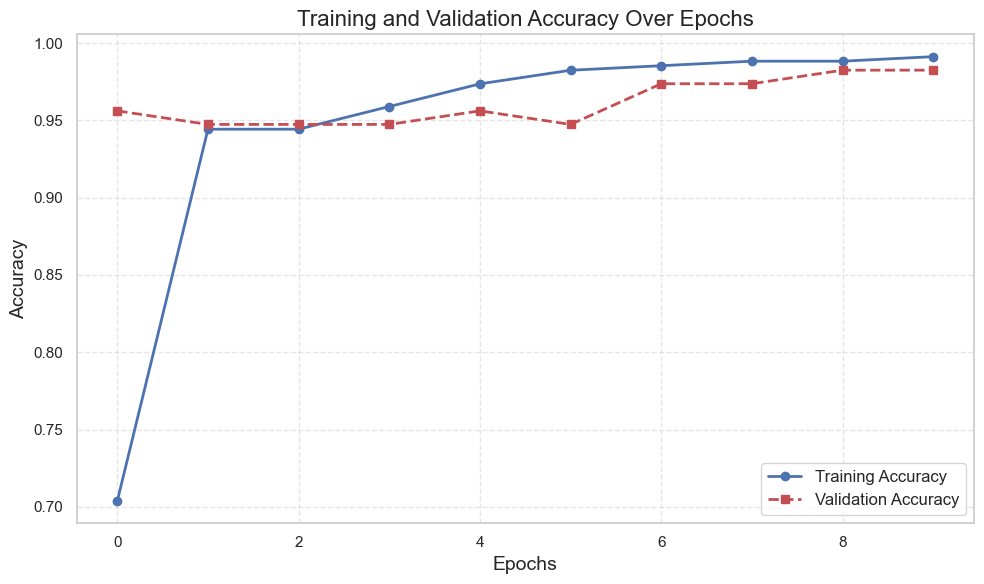

In [11]:
from visualisation.metrics import plot_accuracy
plot_accuracy(history)

In [12]:
# the plot_f1_scores plots the training as well as validation F1 score

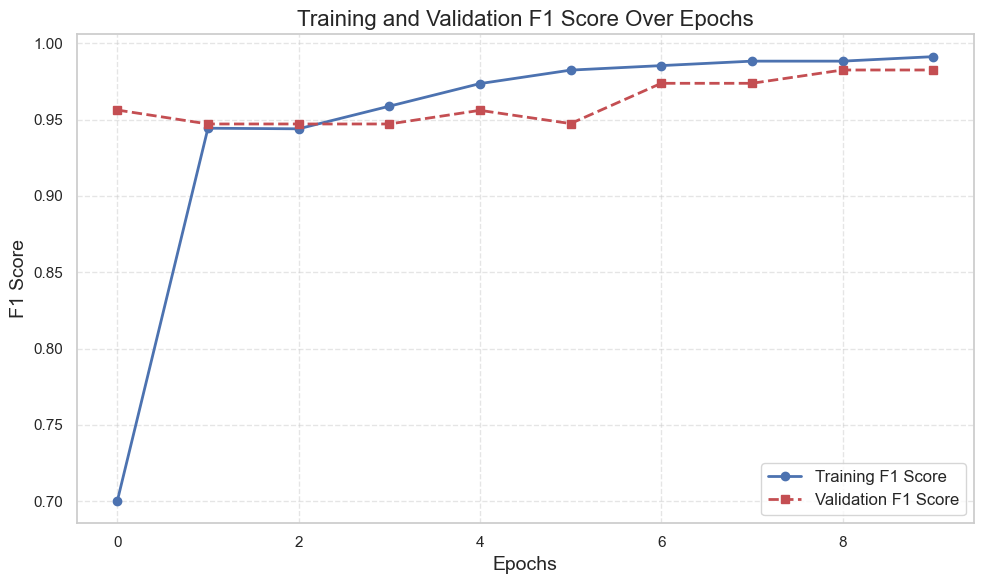

In [13]:
from visualisation.metrics import plot_f1_scores
plot_f1_scores(history)

In [14]:
# The plot_roc_auc function takes in input the trained model, and the X and Y tensors of the test data.

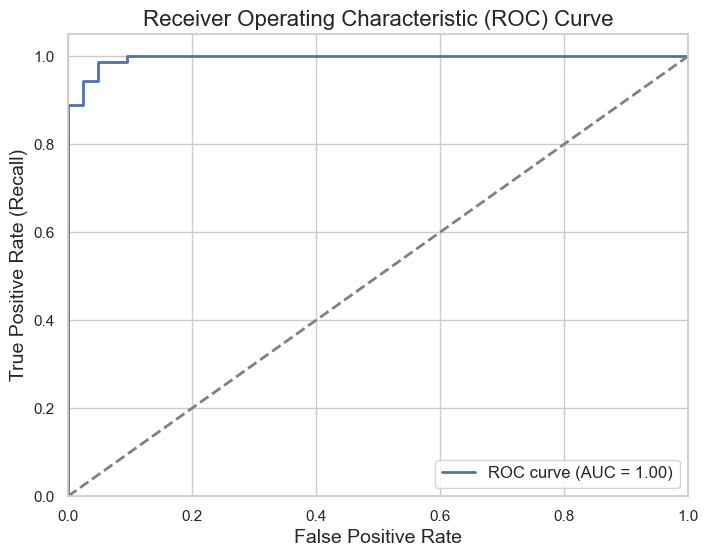

0.9953703703703703

In [15]:
from visualisation.metrics import plot_roc_auc
plot_roc_auc(model,test[0],test[1], device='cpu')

In [16]:
# Lime Analysis starts. From here onwards, we start using the Captum library to gain insights into our model.

In [17]:
# Separating training as well as true labels.

In [18]:
test_data, true_labels = test

In [19]:
# Testing model accuracy on our test dataset
# Get model predictions
import torch
predicted_probs = model(test_data).detach()
predicted_labels = torch.argmax(predicted_probs, dim=1)
accuracy = (predicted == test[1]).float().mean().item() * 100
print(f'Accuracy: {accuracy:.2f}%')

NameError: name 'predicted' is not defined

In [ ]:
from Lime_Analysis.utils import get_subset_samples
from Lime_Analysis.lime_explanations import initialize_lime,generate_explanations

# Get subset of samples, currently four: (FP, TP, FN, TN)
selected_indices = get_subset_samples(test_data, true_labels, model)

In [ ]:
selected_indices

In [ ]:


# Initialize LIME
lime = initialize_lime(model)


In [ ]:

# Generate explanations take input, the Lime instance of the model, test data, the true labels, and the indices of the analysis
# data points, and returns, for each of the analysis data points: 1. Feature importance 2. Time taken to generate these explanations

explanations, time = generate_explanations(lime, test_data, true_labels, selected_indices, )



# # Plot feature importance
# print(f"LIME Explanation for {label}:")
# plot_feature_importance(attributions_np, feature_names, label)

In [ ]:
explanations

In [ ]:
from visualisation.lime import plot_feature_importance
dic = []
for key,val in selected_indices.items() :
    print(key)
    attributions, time = generate_explanations(lime, test_data, true_labels,dict([(key,val)]))
    print(f"LIME Explanation for {key}, time taken : {time} \n")
    plot_feature_importance(explanations[key]['attributions'], feature_names, key)
    dic.append(attributions)


In [ ]:
from visualisation.lime import plot_perturbation_steps
from Lime_Analysis.perturbation import calculate_feature_means, perturb_single_instance

results  = perturb_single_instance({'TP': [1]}, dic[1]['TP']['attributions'], model, test_data, feature_names)
plot_perturbation_steps(results)

In [ ]:
from visualisation.lime import plot_perturbation_curve
from Lime_Analysis.perturbation import  perturb_dataset, compute_aupc

accuracy_results = perturb_dataset(test_data,dic[1]['TP']['attributions'],model,feature_names)
plot_perturbation_curve(accuracy_results )
compute_aupc(accuracy_results)